In [2]:
import baltic as bt
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import itertools

In [3]:
def load_tree(gene):
    tree_path = f"./canineH3N2/h3nx_canineH3N2_{gene}.json"
    mytree, mymeta = bt.loadJSON(tree_path)
    return(mytree)

In [4]:
all_genes_data = {}

list_of_genes = ["HA", "PB1", "PB2","PA","NP","NA","NS"]

for gene in list_of_genes:
    mytree = load_tree(f"{gene}")

    branch_data = {}

    for k in mytree.Objects:
        if k != mytree.root and (k.branchType == "node" or k.branchType == "leaf"):
            name = k.traits["name"]
            date = k.traits["num_date"] - k.parent.traits["num_date"]
            nt_mutations = [mut for mut in k.traits["branch_attrs"]["mutations"].get("nuc", []) if "-" not in mut and "N" not in mut]
            aa_mutations = [mut for mut in k.traits["branch_attrs"]["mutations"].get(f"{gene}", []) if "-" not in mut and "X" not in mut]
            all_nt = len(nt_mutations)

            nonsyn = len(aa_mutations)
            syn = all_nt - nonsyn

            branch_data[name] = (date, all_nt, nonsyn, syn)
    # print(gene,branch_data)
    all_genes_data[gene] = branch_data


Tree height: 18.641848
Tree length: 191.726570
annotations present

Numbers of objects in tree: 552 (241 nodes and 311 leaves)


Tree height: 19.307409
Tree length: 203.367094
annotations present

Numbers of objects in tree: 561 (250 nodes and 311 leaves)


Tree height: 18.206948
Tree length: 167.737235
annotations present

Numbers of objects in tree: 565 (254 nodes and 311 leaves)


Tree height: 18.790501
Tree length: 227.610203
annotations present

Numbers of objects in tree: 553 (242 nodes and 311 leaves)


Tree height: 21.570417
Tree length: 339.914690
annotations present

Numbers of objects in tree: 552 (241 nodes and 311 leaves)


Tree height: 20.706809
Tree length: 185.371044
annotations present

Numbers of objects in tree: 551 (240 nodes and 311 leaves)


Tree height: 17.462681
Tree length: 190.752705
annotations present

Numbers of objects in tree: 570 (259 nodes and 311 leaves)


Tree height: 19.672914
Tree length: 220.502041
annotations present

Numbers of objects in tree: 

In [23]:
all_genes_data = {}

list_of_genes = ["HA", "PB1", "PB2","PA","NP","NA","NS", "MP"]

for gene in list_of_genes:
    mytree = load_tree(f"{gene}")

    branch_data = {}

    for k in mytree.Objects:
        if k != mytree.root and (k.branchType == "node" or k.branchType == "leaf"):
            name = k.traits["name"]
            date = k.traits["num_date"] - k.parent.traits["num_date"]
            nt_mutations = [mut for mut in k.traits["branch_attrs"]["mutations"].get("nuc", []) if "-" not in mut and "N" not in mut]
            all_nt = len(nt_mutations)
            
            if gene == "MP":
                aa_mutations = []
                for sub_gene in ["M1", "M2"]:
                    aa_mutations.extend([
                        mut for mut in k.traits["branch_attrs"]["mutations"].get(sub_gene, [])
                        if "-" not in mut and "X" not in mut
                    ])
            
            elif gene == "NS":
                aa_mutations = []
                for sub_gene in ["NEP", "NS1"]:
                    aa_mutations.extend([
                        mut for mut in k.traits["branch_attrs"]["mutations"].get(sub_gene, [])
                        if "-" not in mut and "X" not in mut
                    ])
            else:
                aa_mutations = [
                    mut for mut in k.traits["branch_attrs"]["mutations"].get(f"{gene}", [])
                    if "-" not in mut and "X" not in mut
                ]
            
            nonsyn = len(aa_mutations)
            syn = all_nt - nonsyn
            branch_data[name] = (date, all_nt, nonsyn, syn)
            
    all_genes_data[gene] = branch_data


Tree height: 18.641848
Tree length: 191.726570
annotations present

Numbers of objects in tree: 552 (241 nodes and 311 leaves)


Tree height: 19.307409
Tree length: 203.367094
annotations present

Numbers of objects in tree: 561 (250 nodes and 311 leaves)


Tree height: 18.206948
Tree length: 167.737235
annotations present

Numbers of objects in tree: 565 (254 nodes and 311 leaves)


Tree height: 18.790501
Tree length: 227.610203
annotations present

Numbers of objects in tree: 553 (242 nodes and 311 leaves)


Tree height: 20.706809
Tree length: 185.371044
annotations present

Numbers of objects in tree: 551 (240 nodes and 311 leaves)


Tree height: 17.462681
Tree length: 190.752705
annotations present

Numbers of objects in tree: 570 (259 nodes and 311 leaves)


Tree height: 19.672914
Tree length: 220.502041
annotations present

Numbers of objects in tree: 547 (236 nodes and 311 leaves)


Tree height: 21.570417
Tree length: 339.914690
annotations present

Numbers of objects in tree: 

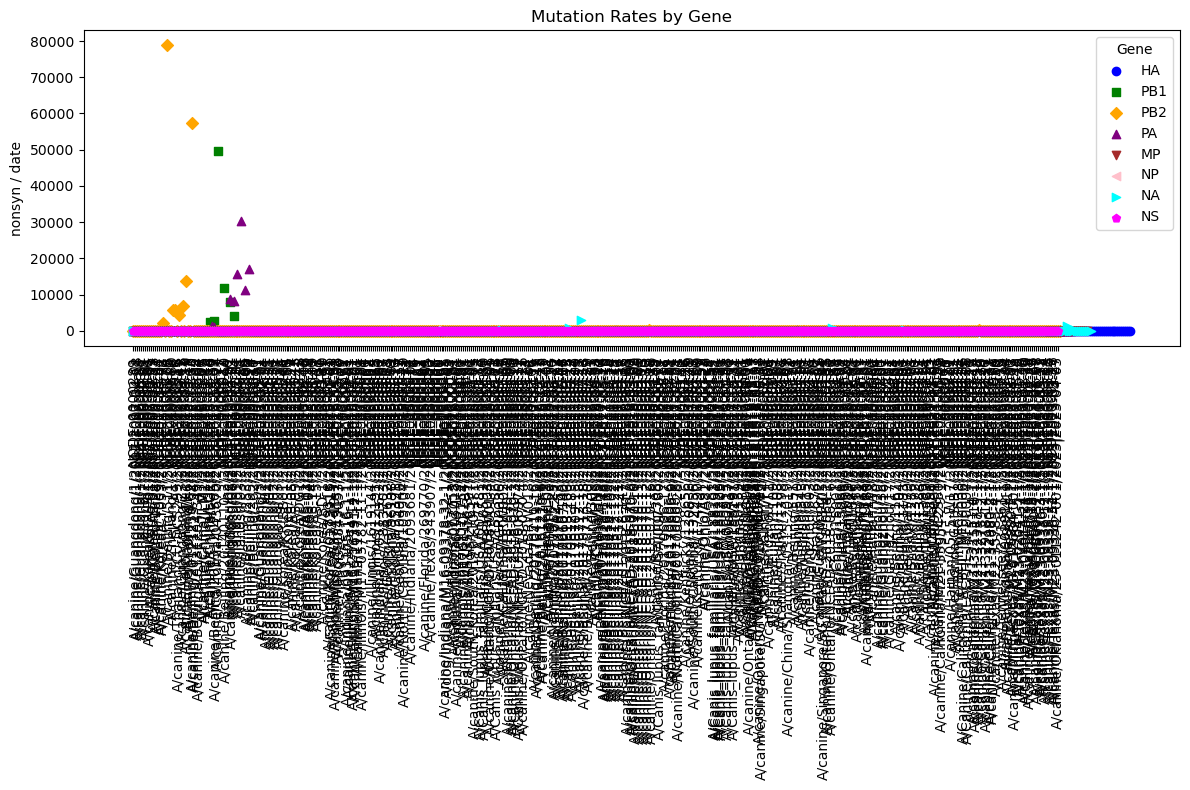

In [17]:
colors = itertools.cycle(['blue', 'green', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta'])
markers = itertools.cycle(['o', 's', 'D', '^', 'v', '<', '>', 'p'])

plt.figure(figsize=(12, 8))

# Loop over each gene and plot its data
for gene in list_of_genes:
    branch_data = all_genes_data[gene]
    
    # Prepare data for plotting
    branch_names = []
    y_values = []
    
    for name, (date, all_nt, nonsyn, syn) in branch_data.items():
        if date != 0:  # Only include branches where date is not zero
            branch_names.append(name)
            y_values.append(nonsyn / date)
    
    # Generate x_values based on the filtered data
    x_values = range(len(branch_names))
    
    # Plot with unique color and marker for the current gene
    plt.scatter(
        x_values, 
        y_values, 
        color=next(colors), 
        marker=next(markers),
        label=gene
    )

# Set labels and title
plt.ylabel("nonsyn / date")
plt.title("Mutation Rates by Gene")
plt.legend(title="Gene")
plt.xticks(x_values, branch_names, rotation=90)
plt.tight_layout()
plt.show()


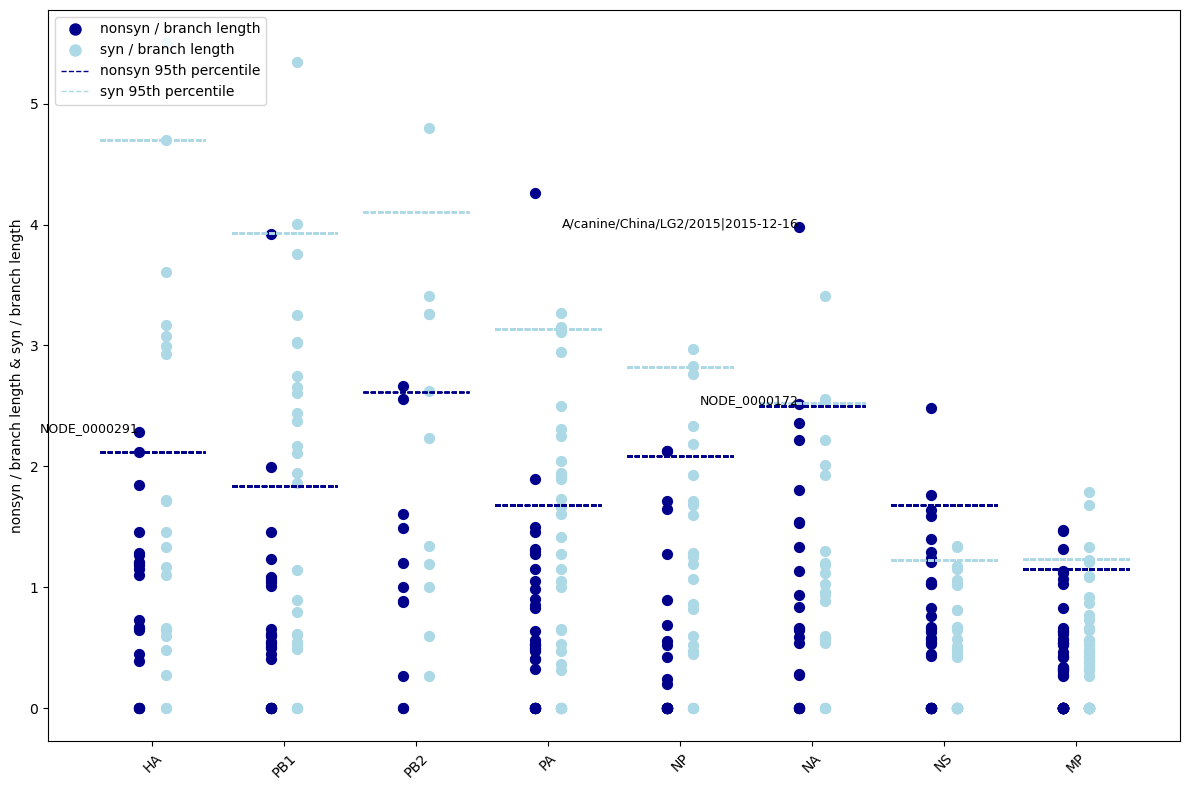

In [22]:
gene_plot_data = {gene: [] for gene in list_of_genes}
nonsyn_names = {gene: [] for gene in list_of_genes}
syn_names = {gene: [] for gene in list_of_genes}

nonsyn_percentiles = {}
syn_percentiles = {}

for gene in list_of_genes:
    branch_data = all_genes_data[gene]
    
    nonsyn_values = []
    syn_values = []
    
    for name, (date, all_nt, nonsyn, syn) in branch_data.items():
        if date > 1.5 and syn >= 0: 
            nonsyn_value = nonsyn / date
            syn_value = syn / date
            gene_plot_data[gene].append((name, nonsyn_value, syn_value))
            nonsyn_values.append(nonsyn_value)
            syn_values.append(syn_value)
    
    nonsyn_percentiles[gene] = np.percentile(nonsyn_values, 95)
    syn_percentiles[gene] = np.percentile(syn_values, 95)

x_values = range(len(list_of_genes))
plt.figure(figsize=(12, 8))

offset = 0.1 

for i, gene in enumerate(list_of_genes):
    y_values = gene_plot_data[gene]
    
    for j, (name, nonsyn_value, syn_value) in enumerate(y_values):
        plt.scatter(i - offset, nonsyn_value, color='darkblue', s=50, edgecolor=None)
        plt.scatter(i + offset, syn_value, color='lightblue', s=50, edgecolor=None)
        plt.hlines(y=nonsyn_percentiles[gene], xmin=i - 0.4, xmax=i + 0.4, color='darkblue', linestyle='--', linewidth=1)
        plt.hlines(y=syn_percentiles[gene], xmin=i - 0.4, xmax=i + 0.4, color='lightblue', linestyle='--', linewidth=1)
    
        if nonsyn_value > nonsyn_percentiles[gene]:
            nonsyn_names[gene].append(name)
            # plt.text(i - offset, nonsyn_value, name, fontsize=9, ha='right', color='black')
        if syn_value > syn_percentiles[gene]:
            syn_names[gene].append(name)
            # plt.text(i + offset, syn_value, name, fontsize=9, ha='left', color='black')
        if gene == "NA":
             if nonsyn_value > nonsyn_percentiles["NA"]:
                plt.text(i - offset, nonsyn_value, name, fontsize=9, ha='right', color='black')
        if gene == "HA":
             if nonsyn_value > nonsyn_percentiles["HA"]:
                plt.text(i - offset, nonsyn_value, name, fontsize=9, ha='right', color='black')
            
            
            
            
plt.xticks(x_values, list_of_genes, rotation=45)
plt.ylabel("nonsyn / branch length & syn / branch length")
plt.tight_layout()

handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='nonsyn / branch length', markerfacecolor='darkblue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='syn / branch length', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], color='darkblue', linestyle='--', linewidth=1, label='nonsyn 95th percentile'),
    plt.Line2D([0], [0], color='lightblue', linestyle='--', linewidth=1, label='syn 95th percentile')
]

plt.legend(handles=handles, loc='upper left')
plt.savefig("./gaps-removed_1,5_95p-lines_gene_specific.pdf")
plt.show()


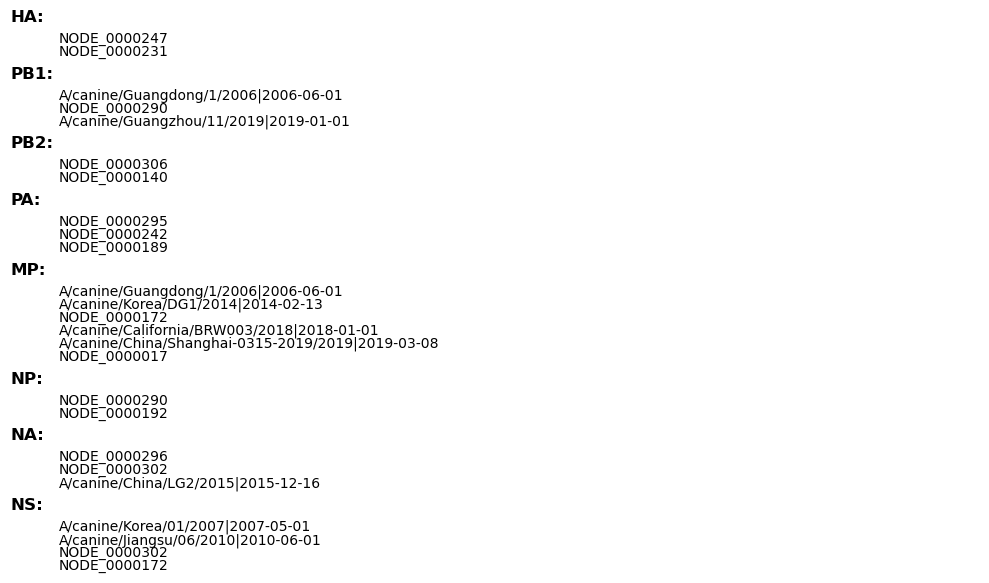

In [8]:
plt.figure(figsize=(10, 6))
plt.axis('off')

# Start text position
y_pos = 1.0
x_pos = 0.0

# # Add each gene and strain names to the plot
# for gene, strains in syn_names.items():
#     plt.text(x_pos, y_pos, f"{gene}:", fontsize=12, fontweight='bold', va='top')
#     y_pos -= 0.05 

#     if strains:
#         for strain in strains:
#             plt.text(x_pos + 0.05, y_pos, strain, fontsize=10, va='top')
#             y_pos -= 0.03 
#     else:
#         plt.text(x_pos + 0.05, y_pos, 'None', fontsize=10, va='top')
#         y_pos -= 0.03

#     y_pos -= 0.02  # Add extra space between genes


for gene, strains in syn_names.items():
    plt.text(x_pos, y_pos, f"{gene}:", fontsize=12, fontweight='bold', va='top')
    y_pos -= 0.05 

    if strains:
        for strain in strains:
            plt.text(x_pos + 0.05, y_pos, strain, fontsize=10, va='top')
            y_pos -= 0.03 
    else:
        plt.text(x_pos + 0.05, y_pos, 'None', fontsize=10, va='top')
        y_pos -= 0.03

    y_pos -= 0.02  # Add extra space between genes

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
def blength_plotter(all_genes_data, list_of_genes, blength_cutoff, save, path):    
    
    gene_plot_data = {gene: [] for gene in list_of_genes}
    nonsyn_names = {gene: [] for gene in list_of_genes}
    syn_names = {gene: [] for gene in list_of_genes}

    nonsyn_percentiles = {}
    syn_percentiles = {}

    for gene in list_of_genes:
        branch_data = all_genes_data[gene]

        nonsyn_values = []
        syn_values = []

        for name, (date, all_nt, nonsyn, syn) in branch_data.items():
            if date > blength_cutoff and syn >= 0: 
                nonsyn_value = nonsyn / date
                syn_value = syn / date
                gene_plot_data[gene].append((name, nonsyn_value, syn_value))
                nonsyn_values.append(nonsyn_value)
                syn_values.append(syn_value)

        nonsyn_percentiles[gene] = np.percentile(nonsyn_values, 95)
        syn_percentiles[gene] = np.percentile(syn_values, 95)

    x_values = range(len(list_of_genes))
    plt.figure(figsize=(12, 8))

    offset = 0.1 

    for i, gene in enumerate(list_of_genes):
        y_values = gene_plot_data[gene]

        for j, (name, nonsyn_value, syn_value) in enumerate(y_values):
            plt.scatter(i - offset, nonsyn_value, color='darkblue', s=50, edgecolor=None)
            plt.scatter(i + offset, syn_value, color='lightblue', s=50, edgecolor=None)
            plt.hlines(y=nonsyn_percentiles[gene], xmin=i - 0.4, xmax=i + 0.4, color='darkblue', linestyle='--', linewidth=1)
            plt.hlines(y=syn_percentiles[gene], xmin=i - 0.4, xmax=i + 0.4, color='lightblue', linestyle='--', linewidth=1)

            if nonsyn_value > nonsyn_percentiles[gene]:
                nonsyn_names[gene].append((name, nonsyn_value))
                # plt.text(i - offset, nonsyn_value, name, fontsize=9, ha='right', color='black')
            if syn_value > syn_percentiles[gene]:
                syn_names[gene].append((name, syn_value))
                # plt.text(i + offset, syn_value, name, fontsize=9, ha='left', color='black')
                
            # if gene == "NA":
            #      if nonsyn_value > nonsyn_percentiles["NA"]:
            #         plt.text(i - offset, nonsyn_value, name, fontsize=9, ha='right', color='black')
            # if gene == "HA":
            #      if nonsyn_value > nonsyn_percentiles["HA"]:
            #         plt.text(i - offset, nonsyn_value, name, fontsize=9, ha='right', color='black')
            
    if save:
        with open(f'./treesort_wholeTree/blength_analysis/{path}_{blength_cutoff}_nonsyn_list.txt', 'w') as f:
            for gene, nodes in nonsyn_names.items():
                f.write(f"{gene} \n {nodes}\n")
        with open(f'./treesort_wholeTree/blength_analysis/{path}_{blength_cutoff}_syn_list.txt', 'w') as f:
            for gene1, nodes1 in syn_names.items():
                f.write(f"{gene1} \n {nodes1}\n")

    plt.xticks(x_values, list_of_genes, rotation=45)
    plt.ylabel("nonsyn / branch length & syn / branch length")

    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label='nonsyn / branch length', markerfacecolor='darkblue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='syn / branch length', markerfacecolor='lightblue', markersize=10),
        plt.Line2D([0], [0], color='darkblue', linestyle='--', linewidth=1, label='nonsyn 95th percentile'),
        plt.Line2D([0], [0], color='lightblue', linestyle='--', linewidth=1, label='syn 95th percentile')
    ]

    plt.legend(handles=handles, loc='upper left')
    if save:
        plt.savefig(f'./treesort_wholeTree/blength_analysis/{path}_{blength_cutoff}.pdf')
    plt.tight_layout()
    plt.show()


In [ ]:
blength_plotter(all_genes_data,list_of_genes, 1.5, False, f"{clade}_blength_analysis")